In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [37]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables

In [7]:
# We can view all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [26]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Save references to each table
Measurement = Base.classes.measurement 
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Exploratory Climate Analysis

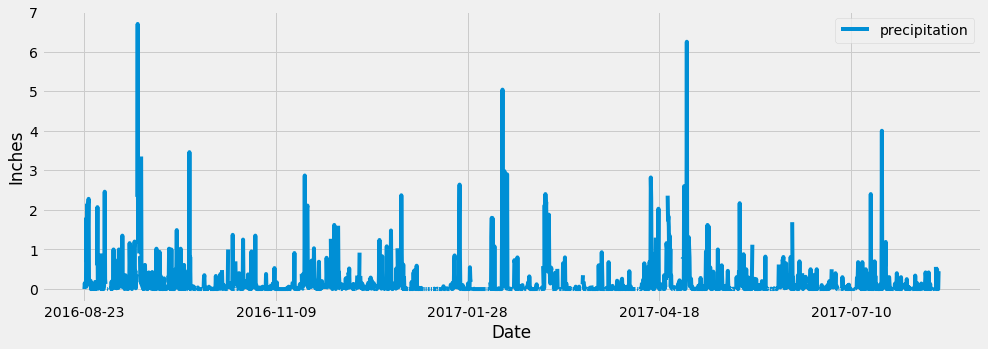

In [79]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first() 
recentDate = dt.datetime.strptime(recent[0], '%Y-%m-%d').date()
pastDate = dt.date(recentDate.year,recentDate.month,recentDate.day) - dt.timedelta(days=365)

lastYear = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= pastDate).\
    order_by(Measurement.date).all()

df = pd.DataFrame(lastYear, columns=['date','prcp'])
df.set_index('date', inplace=True)
df = df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
df.plot.line(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(['precipitation'],loc='best')

In [59]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp,id
count,328.000000,349.000000
mean,0.450640,19376.000000
std,0.717174,100.891856
min,0.000000,19202.000000
25%,0.010000,19289.000000
50%,0.190000,19376.000000
75%,0.610000,19463.000000
max,6.700000,19550.000000


In [67]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [70]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activeStations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all() 

activeStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [71]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
mostStation = activeStations[0][0]

sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

results = session.query(*sel).filter(Measurement.station == station_id).all()

print(f'For station {mostStation}, \
min temp= {results[0][0]}, \
max temp= {results[0][1]}, \
and avg temp= {round(results[0][2],2)}.')

For station USC00519281, min temp= 54.0, max temp= 85.0, and avg temp= 71.66.


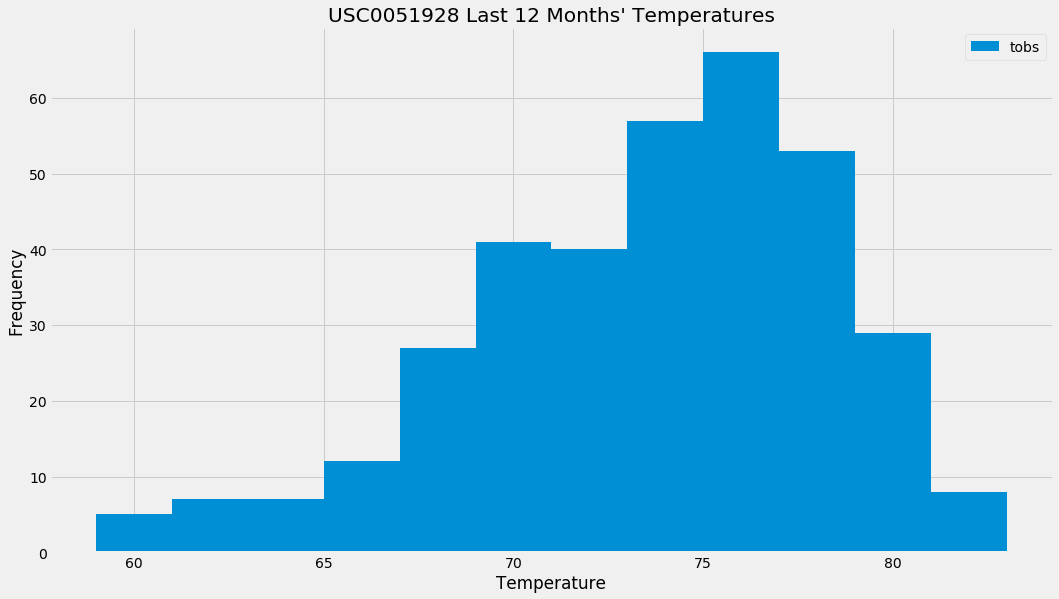

In [81]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
lastYear = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= pastDate).\
    filter(Measurement.station == station_id).all()
lastYear


lastDf = pd.DataFrame(lastYear, columns=['date','tobs'])

lastDf.plot.hist(figsize=(16,9), bins=12, title='USC0051928 Last 12 Months\' Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'],loc='best')
plt.show()